In [1]:
#importar la librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt
import seaborn as sns

plt.style.use('seaborn')
sns.set_style('darkgrid')


C:\Users\MATEO\AppData\Local\Temp\ipykernel_9256\2989828303.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
os.listdir('files')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
#leactura de csv de pandas
df=pd.DataFrame()

In [4]:
files=os.listdir('files')
for x in files:
    file=pd.read_csv('files/'+x)
    df=pd.concat([file,df])


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
#conteo de valores nulos
df['Order ID'].isnull().value_counts()

False    186305
True        545
Name: Order ID, dtype: int64

In [9]:
df=df[df['Order ID'].notnull()]

In [10]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

In [11]:
#definir el tipo de cada variable
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [12]:
df=df[df['Product']!='Product']

In [13]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date']=pd.to_datetime(df['Order Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# CUAL FUE EL MES CON LA VENTA MAS ALTA

In [15]:
#extraer el mes
df['Mes']=df['Order Date'].dt.month\

#realizar la multiplicacion de precio por cantidad
df['Total_Ventas']=df['Quantity Ordered']*df['Price Each']

In [16]:
#agrupaciones primero por mes
df_mes=df.groupby('Mes').sum()

#resetear el indice
df_mes=df_mes.reset_index()


C:\Users\MATEO\AppData\Local\Temp\ipykernel_9256\1613149603.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mes=df.groupby('Mes').sum()


In [ ]:
#df_mes

In [ ]:
#agrupacion la voy haver por fecha
df_fecha=df.groupby('Order Date').sum()

In [ ]:
df_fecha=df_fecha.resample('W').sum()
#df_fecha

In [ ]:
df.head()

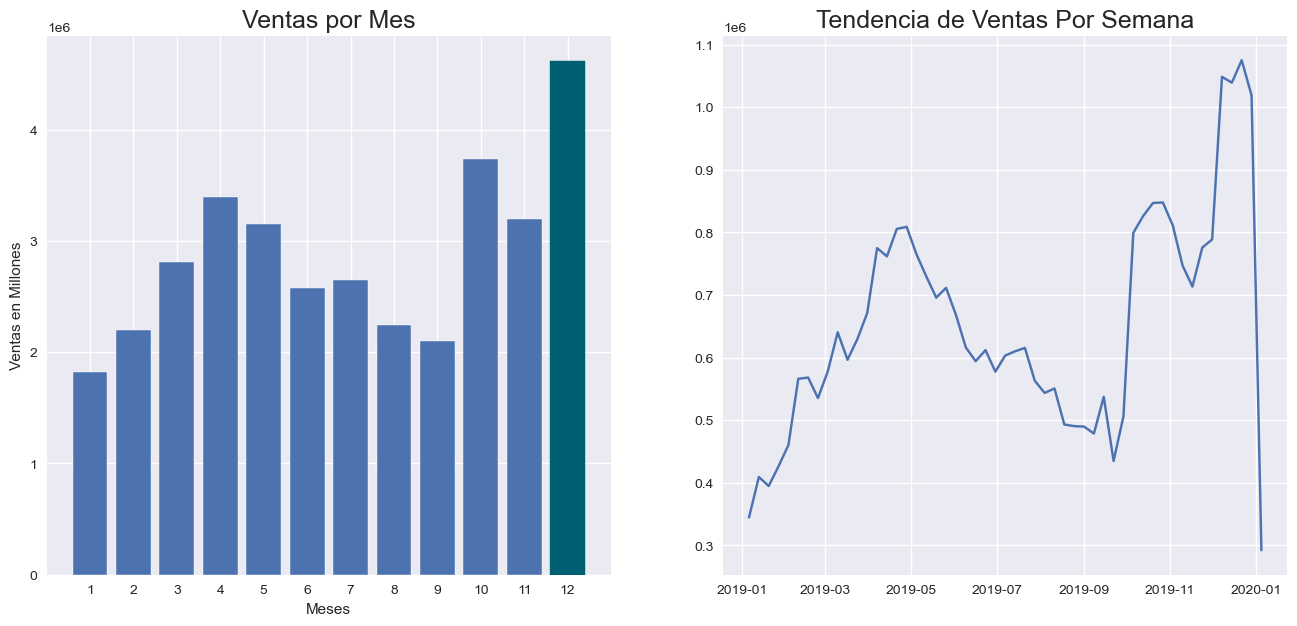

In [22]:
#subplot de graficos
fig, axes=plt.subplots(1,2, figsize=(16,7))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
bars=ax1.bar(df_mes['Mes'], df_mes['Total_Ventas'])
ax2.plot(df_fecha['Total_Ventas'])
ax1.set_xticks(df_mes['Mes'])
ax1.set_title('Ventas por Mes', size=18)
ax2.set_title('Tendencia de Ventas Por Semana', size=18)

ax1.set_xlabel('Meses')
ax1.set_ylabel('Ventas en Millones')
bars[11].set_color('#005f73')

plt.show()


C:\Users\MATEO\AppData\Local\Temp\ipykernel_9256\188879148.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fecha=df.groupby('Order Date').sum()


# CUAL ES LA CIUDAD CON MAYOR VENTA

In [ ]:
df['Ciudad']=df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

In [ ]:
#grafica para ver la ciudad
df_ciudad=df.groupby('Ciudad').sum()

df_ciudad=df_ciudad.reset_index()


In [ ]:
bars=plt.bar(df_ciudad['Ciudad'], df_ciudad['Total_Ventas'])
plt.xticks(rotation=90)
bars[7].set_color('r')
plt.show()

# CUAL ES LA HORA A QUE MAS SE VENDEN PRODUCTOS

In [ ]:
df.head()

In [ ]:
df['Hora']=df['Order Date'].apply(lambda x: x.hour)
df.head()

In [ ]:
#agrupacion por las horas 
df_hour=df.groupby('Hora').sum()
df_hour=df_hour.reset_index()

In [ ]:
#grafica de lineas
plt.plot(df_hour['Total_Ventas'], marker='o')
plt.xticks(df_hour['Hora'])
plt.title('Ventas por hora del día')

plt.show()